<a href="https://colab.research.google.com/github/pranitha2144/Internship-iith/blob/Resnet/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import keras
from keras.models import Model
from keras.layers import Dense,Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [69]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/My Drive/data_ouput/train",target_size=(224,224),class_mode='categorical',batch_size=32)
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/My Drive/data_ouput/val", target_size=(224,224),class_mode='categorical',batch_size=32)

Found 800 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [61]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [62]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [64]:
X= vggmodel.layers[-2].output

predictions = Dense(4, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [65]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [66]:
model_final.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [70]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
hist=model_final.fit(traindata, steps_per_epoch= 2, epochs= 100, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

Epoch 1/100
2/2 [==============================] - 53s 26s/step - loss: 1.7666 - accuracy: 0.4375 - val_loss: 2.5924 - val_accuracy: 0.5312

Epoch 00001: val_accuracy improved from -inf to 0.53125, saving model to vgg16_1.h5


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/100
2/2 [==============================] - 53s 26s/step - loss: 1.9498 - accuracy: 0.5625 - val_loss: 1.4919 - val_accuracy: 0.5312

Epoch 00002: val_accuracy did not improve from 0.53125
Epoch 3/100
2/2 [==============================] - 51s 25s/step - loss: 0.8931 - accuracy: 0.6719 - val_loss: 0.5652 - val_accuracy: 0.7500

Epoch 00003: val_accuracy improved from 0.53125 to 0.75000, saving model to vgg16_1.h5
Epoch 4/100
2/2 [==============================] - 37s 19s/step - loss: 0.6596 - accuracy: 0.7500 - val_loss: 0.8276 - val_accuracy: 0.7500

Epoch 00004: val_accuracy did not improve from 0.75000
Epoch 5/100
2/2 [==============================] - 51s 25s/step - loss: 0.7595 - accuracy: 0.7188 - val_loss: 0.8303 - val_accuracy: 0.6875

Epoch 00005: val_accuracy did not improve from 0.75000
Epoch 6/100
2/2 [==============================] - 51s 25s/step - loss: 0.4515 - accuracy: 0.8594 - val_loss: 0.5173 - val_accuracy: 0.7812

Epoch 00006: val_accuracy improved from 0.7

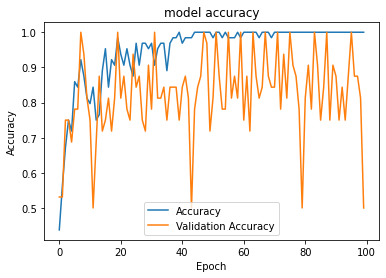

In [71]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

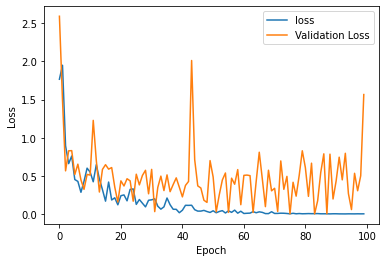

In [72]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [73]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

test_datagen = ImageDataGenerator()

In [74]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/data_ouput/test',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 100 images belonging to 4 classes.


In [75]:
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model_final.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['grade0', 'grade1', 'grade2','grade3']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 4  8  6  7]
 [10  6  3  6]
 [ 6  6  8  5]
 [ 3  7  7  8]]
Classification Report
              precision    recall  f1-score   support

      grade0       0.17      0.16      0.17        25
      grade1       0.22      0.24      0.23        25
      grade2       0.33      0.32      0.33        25
      grade3       0.31      0.32      0.31        25

    accuracy                           0.26       100
   macro avg       0.26      0.26      0.26       100
weighted avg       0.26      0.26      0.26       100



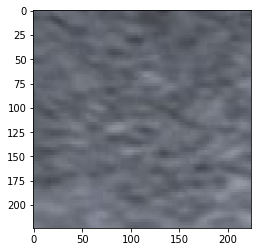

In [76]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img("/content/drive/My Drive/data_ouput/test/grade1/grade1-079.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

In [77]:
output = model_final.predict(img)

In [78]:
output
ans='grade'+str(np.argmax(output[0],axis=0))
print(ans)

grade1


In [79]:
import os
data_path='/content/drive/My Drive/data_ouput/test'
data_dir_list=os.listdir(data_path)
for dataset in data_dir_list:
  print(dataset)
  img_list=os.listdir(data_path+'/'+dataset)
  correctCount=0
  wrongCount=0
  for img in img_list:
    img_path=data_path+'/'+dataset+'/'+img
    input_image = image.load_img(img_path,target_size=(224,224))
    input_image = np.asarray(input_image)
    input_image = np.expand_dims(input_image, axis=0)
    output = model_final.predict(input_image)
    ans='grade'+str(np.argmax(output[0],axis=0))
    if( ans in img):
      correctCount+=1
    else:
      wrongCount+=1
  print("correct Count {} WrongCount {}".format(correctCount,wrongCount))




grade1
correct Count 21 WrongCount 4
grade0
correct Count 22 WrongCount 3
grade2
correct Count 22 WrongCount 3
grade3
correct Count 23 WrongCount 2


In [80]:
tr_loss,tr_acc=model_final.evaluate(validation_generator)
tr_acc

4/4 [==============================] - 50s 13s/step


0.8799999952316284

In [ ]:
model_final.save('/content/drive/My Drive/Best models/modelbest.h5')